Libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.preprocessing import StandardScaler
import joblib
from pathlib import Path

In [3]:
sns.set_theme(style="whitegrid")

file_path="D:\\personalCode\\churn-prediction\\data\\Telco_customer_churn.xlsx"
df=pd.read_excel(file_path)

print("Shape: ", df.shape)
print("Columns :\n", df.columns)
df.head()

Shape:  (7043, 33)
Columns :
 Index(['CustomerID', 'Count', 'Country', 'State', 'City', 'Zip Code',
       'Lat Long', 'Latitude', 'Longitude', 'Gender', 'Senior Citizen',
       'Partner', 'Dependents', 'Tenure Months', 'Phone Service',
       'Multiple Lines', 'Internet Service', 'Online Security',
       'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV',
       'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method',
       'Monthly Charges', 'Total Charges', 'Churn Label', 'Churn Value',
       'Churn Score', 'CLTV', 'Churn Reason'],
      dtype='object')


,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


Preprocessing

In [4]:
df = df.drop(columns=[
    'CustomerID', 'Count', 'Country', 'State', 'City', 'Zip Code', 'Lat Long', 'Latitude', 'Longitude', 'Churn Label', 'Churn Score', 'CLTV', 'Churn Reason',
])

df.rename(columns={
    'Tenure Months': 'tenure',
    'Monthly Charges': 'MonthlyCharges',
    'Total Charges': 'TotalCharges',
    'Churn Value': 'Churn'
}, inplace=True)

df['TotalCharges']=pd.to_numeric(df['TotalCharges'], errors='coerce')

#dropping rows with missing totalcharges values
df=df.dropna(subset=['TotalCharges']).copy()

In [5]:
print("Final Shape: ", df.shape)
print("Final Columns: ", df.columns)

Final Shape:  (7032, 20)
Final Columns:  Index(['Gender', 'Senior Citizen', 'Partner', 'Dependents', 'tenure',
       'Phone Service', 'Multiple Lines', 'Internet Service',
       'Online Security', 'Online Backup', 'Device Protection', 'Tech Support',
       'Streaming TV', 'Streaming Movies', 'Contract', 'Paperless Billing',
       'Payment Method', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')


In [6]:
df.head()

,Gender,Senior Citizen,Partner,Dependents,tenure,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,MonthlyCharges,TotalCharges,Churn
0,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
1,Female,No,No,Yes,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
2,Female,No,No,Yes,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,1
3,Female,No,Yes,Yes,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,1
4,Male,No,No,Yes,49,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.30,1


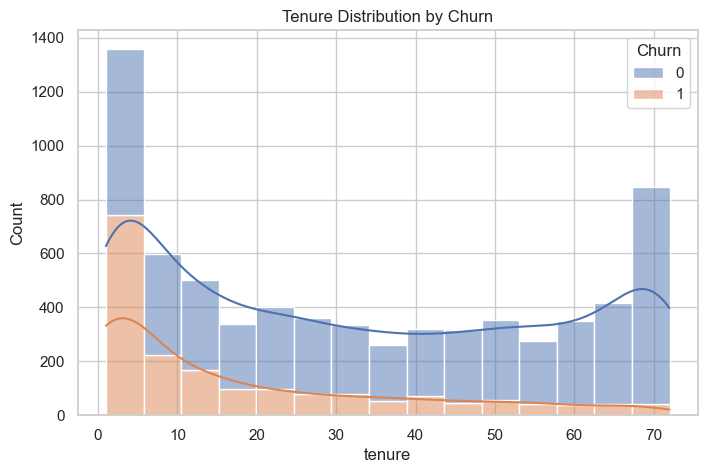

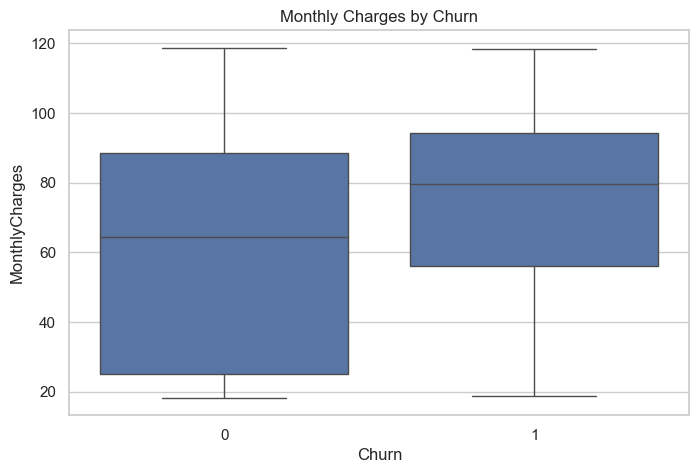

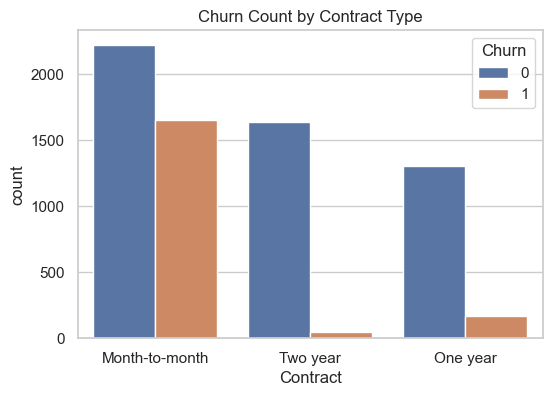

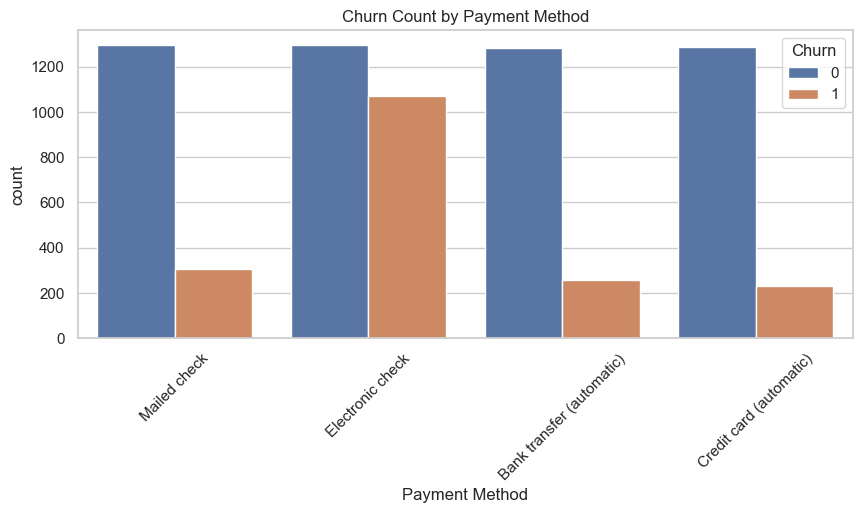

In [7]:
# Tenure distribution
plt.figure(figsize=(8,5))
sns.histplot(data=df, x='tenure', hue='Churn', kde=True, multiple='stack')
plt.title('Tenure Distribution by Churn')
plt.show()

# Monthly charges distribution
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x='Churn', y='MonthlyCharges')
plt.title('Monthly Charges by Churn')
plt.show()

# Contract type vs churn
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Contract', hue='Churn')
plt.title('Churn Count by Contract Type')
plt.show()

# Payment method vs churn
plt.figure(figsize=(10,4))
sns.countplot(data=df, x='Payment Method', hue='Churn')
plt.xticks(rotation=45)
plt.title('Churn Count by Payment Method')
plt.show()

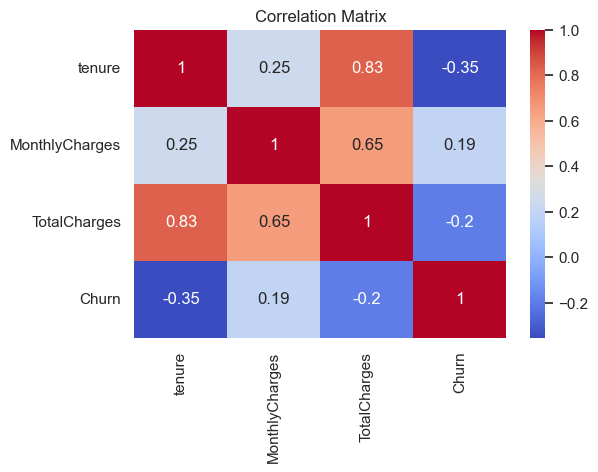

In [8]:
plt.figure(figsize=(6,4))
sns.heatmap(df[['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [9]:
df.head()

,Gender,Senior Citizen,Partner,Dependents,tenure,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,MonthlyCharges,TotalCharges,Churn
0,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
1,Female,No,No,Yes,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
2,Female,No,No,Yes,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,1
3,Female,No,Yes,Yes,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,1
4,Male,No,No,Yes,49,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.30,1


In [10]:
binary_cols=['Gender', 'Senior Citizen', 'Partner', 'Dependents', 'Phone Service', 'Paperless Billing']

for col in binary_cols:
    df[col]=df[col].map({'Yes':1, 'No':0, 'Male': 1, 'Female': 0}).astype(int)

In [11]:
for col in binary_cols:
    print(col, df[col].unique())

Gender [1 0]
Senior Citizen [0 1]
Partner [0 1]
Dependents [0 1]
Phone Service [1 0]
Paperless Billing [1 0]


In [12]:
df.head()

,Gender,Senior Citizen,Partner,Dependents,tenure,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,MonthlyCharges,TotalCharges,Churn
0,1,0,0,0,2,1,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,1
1,0,0,0,1,2,1,No,Fiber optic,No,No,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,1
2,0,0,0,1,8,1,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,1,Electronic check,99.65,820.50,1
3,0,0,1,1,28,1,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,1,Electronic check,104.80,3046.05,1
4,1,0,0,1,49,1,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,1,Bank transfer (automatic),103.70,5036.30,1


In [13]:
print(df.columns)

for col in df.columns:
    print(col, df[col].unique())

Index(['Gender', 'Senior Citizen', 'Partner', 'Dependents', 'tenure',
       'Phone Service', 'Multiple Lines', 'Internet Service',
       'Online Security', 'Online Backup', 'Device Protection', 'Tech Support',
       'Streaming TV', 'Streaming Movies', 'Contract', 'Paperless Billing',
       'Payment Method', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')
Gender [1 0]
Senior Citizen [0 1]
Partner [0 1]
Dependents [0 1]
tenure [ 2  8 28 49 10  1 47 17  5 34 11 15 18  9  7 12 25 68 55 37  3 27 20  4
 58 53 13  6 19 59 16 52 24 32 38 54 43 63 21 69 22 61 60 48 40 23 39 35
 56 65 33 30 45 46 62 70 50 44 71 26 14 41 66 64 29 42 67 51 31 57 36 72]
Phone Service [1 0]
Multiple Lines ['No' 'Yes' 'No phone service']
Internet Service ['DSL' 'Fiber optic' 'No']
Online Security ['Yes' 'No' 'No internet service']
Online Backup ['Yes' 'No' 'No internet service']
Device Protection ['No' 'Yes' 'No internet service']
Tech Support ['No' 'Yes' 'No internet service']
Streaming TV ['No

In [14]:
multi_class_cols = [
    'Multiple Lines',
    'Internet Service',
    'Online Security',
    'Online Backup',
    'Device Protection',
    'Tech Support',
    'Streaming TV',
    'Streaming Movies',
    'Contract',
    'Payment Method'
]

numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

df = pd.get_dummies(df, columns=multi_class_cols, drop_first=True)

In [15]:
df.head()

,Gender,Senior Citizen,Partner,Dependents,tenure,Phone Service,Paperless Billing,MonthlyCharges,TotalCharges,Churn,...,Tech Support_Yes,Streaming TV_No internet service,Streaming TV_Yes,Streaming Movies_No internet service,Streaming Movies_Yes,Contract_One year,Contract_Two year,Payment Method_Credit card (automatic),Payment Method_Electronic check,Payment Method_Mailed check
0,1,0,0,0,2,1,1,53.85,108.15,1,...,False,False,False,False,False,False,False,False,False,True
1,0,0,0,1,2,1,1,70.70,151.65,1,...,False,False,False,False,False,False,False,False,True,False
2,0,0,0,1,8,1,1,99.65,820.50,1,...,False,False,True,False,True,False,False,False,True,False
3,0,0,1,1,28,1,1,104.80,3046.05,1,...,True,False,True,False,True,False,False,False,True,False
4,1,0,0,1,49,1,1,103.70,5036.30,1,...,False,False,True,False,True,False,False,False,False,False


In [16]:
print(df.columns)

for col in df.columns:
    print(col, df[col].unique())

Index(['Gender', 'Senior Citizen', 'Partner', 'Dependents', 'tenure',
       'Phone Service', 'Paperless Billing', 'MonthlyCharges', 'TotalCharges',
       'Churn', 'Multiple Lines_No phone service', 'Multiple Lines_Yes',
       'Internet Service_Fiber optic', 'Internet Service_No',
       'Online Security_No internet service', 'Online Security_Yes',
       'Online Backup_No internet service', 'Online Backup_Yes',
       'Device Protection_No internet service', 'Device Protection_Yes',
       'Tech Support_No internet service', 'Tech Support_Yes',
       'Streaming TV_No internet service', 'Streaming TV_Yes',
       'Streaming Movies_No internet service', 'Streaming Movies_Yes',
       'Contract_One year', 'Contract_Two year',
       'Payment Method_Credit card (automatic)',
       'Payment Method_Electronic check', 'Payment Method_Mailed check'],
      dtype='object')
Gender [1 0]
Senior Citizen [0 1]
Partner [0 1]
Dependents [0 1]
tenure [ 2  8 28 49 10  1 47 17  5 34 11 15 18  9  7 

In [17]:
df.head()

,Gender,Senior Citizen,Partner,Dependents,tenure,Phone Service,Paperless Billing,MonthlyCharges,TotalCharges,Churn,...,Tech Support_Yes,Streaming TV_No internet service,Streaming TV_Yes,Streaming Movies_No internet service,Streaming Movies_Yes,Contract_One year,Contract_Two year,Payment Method_Credit card (automatic),Payment Method_Electronic check,Payment Method_Mailed check
0,1,0,0,0,2,1,1,53.85,108.15,1,...,False,False,False,False,False,False,False,False,False,True
1,0,0,0,1,2,1,1,70.70,151.65,1,...,False,False,False,False,False,False,False,False,True,False
2,0,0,0,1,8,1,1,99.65,820.50,1,...,False,False,True,False,True,False,False,False,True,False
3,0,0,1,1,28,1,1,104.80,3046.05,1,...,True,False,True,False,True,False,False,False,True,False
4,1,0,0,1,49,1,1,103.70,5036.30,1,...,False,False,True,False,True,False,False,False,False,False


In [18]:
all_cols=df.columns.tolist()
multi_class_cols=[col for col in all_cols if col not in numerical_cols+binary_cols]

df=pd.get_dummies(df, columns=multi_class_cols,drop_first=False, dtype=int)

In [19]:
df.head()

,Gender,Senior Citizen,Partner,Dependents,tenure,Phone Service,Paperless Billing,MonthlyCharges,TotalCharges,Churn_0,...,Contract_One year_False,Contract_One year_True,Contract_Two year_False,Contract_Two year_True,Payment Method_Credit card (automatic)_False,Payment Method_Credit card (automatic)_True,Payment Method_Electronic check_False,Payment Method_Electronic check_True,Payment Method_Mailed check_False,Payment Method_Mailed check_True
0,1,0,0,0,2,1,1,53.85,108.15,0,...,1,0,1,0,1,0,1,0,0,1
1,0,0,0,1,2,1,1,70.70,151.65,0,...,1,0,1,0,1,0,0,1,1,0
2,0,0,0,1,8,1,1,99.65,820.50,0,...,1,0,1,0,1,0,0,1,1,0
3,0,0,1,1,28,1,1,104.80,3046.05,0,...,1,0,1,0,1,0,0,1,1,0
4,1,0,0,1,49,1,1,103.70,5036.30,0,...,1,0,1,0,1,0,1,0,1,0


In [20]:
df['tenure_bucket']=pd.cut(df['tenure'], bins=[0, 12, 24, 48, 60, 72], labels=False)
df.head()

,Gender,Senior Citizen,Partner,Dependents,tenure,Phone Service,Paperless Billing,MonthlyCharges,TotalCharges,Churn_0,...,Contract_One year_True,Contract_Two year_False,Contract_Two year_True,Payment Method_Credit card (automatic)_False,Payment Method_Credit card (automatic)_True,Payment Method_Electronic check_False,Payment Method_Electronic check_True,Payment Method_Mailed check_False,Payment Method_Mailed check_True,tenure_bucket
0,1,0,0,0,2,1,1,53.85,108.15,0,...,0,1,0,1,0,1,0,0,1,0
1,0,0,0,1,2,1,1,70.70,151.65,0,...,0,1,0,1,0,0,1,1,0,0
2,0,0,0,1,8,1,1,99.65,820.50,0,...,0,1,0,1,0,0,1,1,0,0
3,0,0,1,1,28,1,1,104.80,3046.05,0,...,0,1,0,1,0,0,1,1,0,2
4,1,0,0,1,49,1,1,103.70,5036.30,0,...,0,1,0,1,0,1,0,1,0,3


In [21]:
scaler=StandardScaler()

df[numerical_cols]=scaler.fit_transform(df[numerical_cols])

In [22]:
scaler_path=Path.cwd().parent/"models"/"scaler.joblib"
joblib.dump(scaler, scaler_path)

['d:\\personalCode\\churn-prediction\\models\\scaler.joblib']

In [23]:
df.head()

,Gender,Senior Citizen,Partner,Dependents,tenure,Phone Service,Paperless Billing,MonthlyCharges,TotalCharges,Churn_0,...,Contract_One year_True,Contract_Two year_False,Contract_Two year_True,Payment Method_Credit card (automatic)_False,Payment Method_Credit card (automatic)_True,Payment Method_Electronic check_False,Payment Method_Electronic check_True,Payment Method_Mailed check_False,Payment Method_Mailed check_True,tenure_bucket
0,1,0,0,0,-1.239504,1,1,-0.363923,-0.959649,0,...,0,1,0,1,0,1,0,0,1,0
1,0,0,0,1,-1.239504,1,1,0.196178,-0.940457,0,...,0,1,0,1,0,0,1,1,0,0
2,0,0,0,1,-0.995040,1,1,1.158489,-0.645369,0,...,0,1,0,1,0,0,1,1,0,0
3,0,0,1,1,-0.180161,1,1,1.329677,0.336516,0,...,0,1,0,1,0,0,1,1,0,2
4,1,0,0,1,0.675462,1,1,1.293113,1.214589,0,...,0,1,0,1,0,1,0,1,0,3


In [32]:
print(df.columns)

len(df.columns)

for col in df.columns:
    print(col, df[col].unique())

print(len(df.columns))

Index(['Gender', 'Senior Citizen', 'Partner', 'Dependents', 'tenure',
       'Phone Service', 'Paperless Billing', 'MonthlyCharges', 'TotalCharges',
       'Multiple Lines_No phone service_False',
       'Multiple Lines_No phone service_True', 'Multiple Lines_Yes_False',
       'Multiple Lines_Yes_True', 'Internet Service_Fiber optic_False',
       'Internet Service_Fiber optic_True', 'Internet Service_No_False',
       'Internet Service_No_True', 'Online Security_No internet service_False',
       'Online Security_No internet service_True', 'Online Security_Yes_False',
       'Online Security_Yes_True', 'Online Backup_No internet service_False',
       'Online Backup_No internet service_True', 'Online Backup_Yes_False',
       'Online Backup_Yes_True', 'Device Protection_No internet service_False',
       'Device Protection_No internet service_True',
       'Device Protection_Yes_False', 'Device Protection_Yes_True',
       'Tech Support_No internet service_False',
       'Tech Suppor

In [25]:
df['churn_label']=df['Churn_1']
df.drop(columns=['Churn_0', 'Churn_1'], inplace=True)

In [26]:
print(df.columns)

Index(['Gender', 'Senior Citizen', 'Partner', 'Dependents', 'tenure',
       'Phone Service', 'Paperless Billing', 'MonthlyCharges', 'TotalCharges',
       'Multiple Lines_No phone service_False',
       'Multiple Lines_No phone service_True', 'Multiple Lines_Yes_False',
       'Multiple Lines_Yes_True', 'Internet Service_Fiber optic_False',
       'Internet Service_Fiber optic_True', 'Internet Service_No_False',
       'Internet Service_No_True', 'Online Security_No internet service_False',
       'Online Security_No internet service_True', 'Online Security_Yes_False',
       'Online Security_Yes_True', 'Online Backup_No internet service_False',
       'Online Backup_No internet service_True', 'Online Backup_Yes_False',
       'Online Backup_Yes_True', 'Device Protection_No internet service_False',
       'Device Protection_No internet service_True',
       'Device Protection_Yes_False', 'Device Protection_Yes_True',
       'Tech Support_No internet service_False',
       'Tech Suppor

In [27]:
df.head()

,Gender,Senior Citizen,Partner,Dependents,tenure,Phone Service,Paperless Billing,MonthlyCharges,TotalCharges,Multiple Lines_No phone service_False,...,Contract_Two year_False,Contract_Two year_True,Payment Method_Credit card (automatic)_False,Payment Method_Credit card (automatic)_True,Payment Method_Electronic check_False,Payment Method_Electronic check_True,Payment Method_Mailed check_False,Payment Method_Mailed check_True,tenure_bucket,churn_label
0,1,0,0,0,-1.239504,1,1,-0.363923,-0.959649,1,...,1,0,1,0,1,0,0,1,0,1
1,0,0,0,1,-1.239504,1,1,0.196178,-0.940457,1,...,1,0,1,0,0,1,1,0,0,1
2,0,0,0,1,-0.995040,1,1,1.158489,-0.645369,1,...,1,0,1,0,0,1,1,0,0,1
3,0,0,1,1,-0.180161,1,1,1.329677,0.336516,1,...,1,0,1,0,0,1,1,0,2,1
4,1,0,0,1,0.675462,1,1,1.293113,1.214589,1,...,1,0,1,0,1,0,1,0,3,1


In [28]:
df['churn_label'].value_counts(normalize=True)

churn_label
0    0.734215
1    0.265785
Name: proportion, dtype: float64

In [ ]:
df_save_path=Path.cwd().parent/"data"/"processed_telco_churn.csv"
df.to_csv(df_save_path, index=False)

In [37]:
payment_cols = [col for col in df.columns if col in ["Payment Method_Credit card (automatic)_True", "Payment Method_Mailed check_True", "Payment Method_Electronic check_True"]]
df['payment_method_sum'] = df[payment_cols].sum(axis=1)
print(df['payment_method_sum'].unique())


[1 0]
